In [55]:
import sys
sys.path.append('C:/Users/shjo/Bridge/JNUpack/mySO_src/libs/')
import matplotlib as mpl
# mpl.use('agg')
import os
import numpy as np
import xarray as xr
from myTrend import myfitting2d_sttcs
from myPlot import  figmaster,myClrbr,dta_colr
from myTools import myInfo
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

varnm = 'OHC700'
t_rng=['1993-01','2023-12']

# pthrn='J:/Reanalysis/'
pthmd='J:/tmp_proc/Models/'
pthob='J:/tmp_proc/Obs/'

wpth='C:/Users/shjo/OneDrive/mySO/TimeSeries_STD/'

myMdls=[pthmd+i for i in os.listdir(pthmd) if i.endswith('.nc')]
myObsv=[pthob+i for i in os.listdir(pthob) if i.endswith('.nc')]

myDATA=myMdls+myObsv

if int(t_rng[0][:4])<1992:
    myDATA=[i for i in myDATA if not i.split('/')[-1].startswith('myECCO')]
    myDATA=[i for i in myDATA if not i.split('/')[-1].startswith('myISAS')]
    myDATA=[i for i in myDATA if not i.split('/')[-1].startswith('myARMOR3D')]

wpth=wpth+'TimeSeries_'+varnm+'_'+str(t_rng[0])+'_'+str(t_rng[-1])+'/'
wpth=wpth.replace('-','')

try :
    os.mkdir(wpth)
    loc=sys._getframe().f_code.co_filename
    myInfo(loc,wpth)
except:
    raise

In [61]:


### Reanalysis SST trend =================================================
print('!!! Open files !!!')
lat_rng=[-75,-30]; lon_rng=[0,360];myNm=[]; mySig=[]
for i in myDATA: 
    print('!!! Open: '+i+' !!!')
    mydata = xr.open_dataset(i)[varnm].loc[dict(lat=slice(lat_rng[0],lat_rng[-1])\
        ,lon=slice(lon_rng[0],lon_rng[-1]),time=slice(t_rng[0],t_rng[-1]))]
    mydata=mydata.where(mydata>-10**23)
    mydata=mydata.where(mydata<10**23)

    mydata=mydata.mean(dim=['lat','lon']).rolling(time=12,center=True).mean()
    time=mydata.time.values
    dta_nm=i.split('/')[-1][2:-3].split('_')[0]+' '+varnm+' '+'trend '+\
        str(time[0])[:4]+' '+str(time[-1])[:4]
    
    mySig.append(mydata)
    myNm.append(i.split('/')[-1][2:-3].split('_')[0])
        

!!! Open files !!!
!!! Open: J:/tmp_proc/Models/myECCO_199201_201712_tsh.nc !!!
!!! Open: J:/tmp_proc/Models/myGECCO_195501_201812_ztshuv.nc !!!
!!! Open: J:/tmp_proc/Obs/myARMOR3D_SO_199301_202312_tsh.nc !!!
!!! Open: J:/tmp_proc/Obs/myCORA_1rg_196001_202212_tsh.nc !!!
!!! Open: J:/tmp_proc/Obs/myEN4_195501_202212_tsh.nc !!!
!!! Open: J:/tmp_proc/Obs/myIAP_195501_202212_tshuv.nc !!!
!!! Open: J:/tmp_proc/Obs/myISAS17_SO_200201_201712_tsh.nc !!!
!!! Open: J:/tmp_proc/Obs/myISHII_195501_202212_tsh.nc !!!


ECCO
GECCO
ARMOR3D
CORA
EN4
IAP
ISAS17
ISHII
C:/Users/shjo/OneDrive/mySO/TimeSeries_STD/TimeSeries_OHC700_199301_202312/TimeSeries1993-01_2023-12


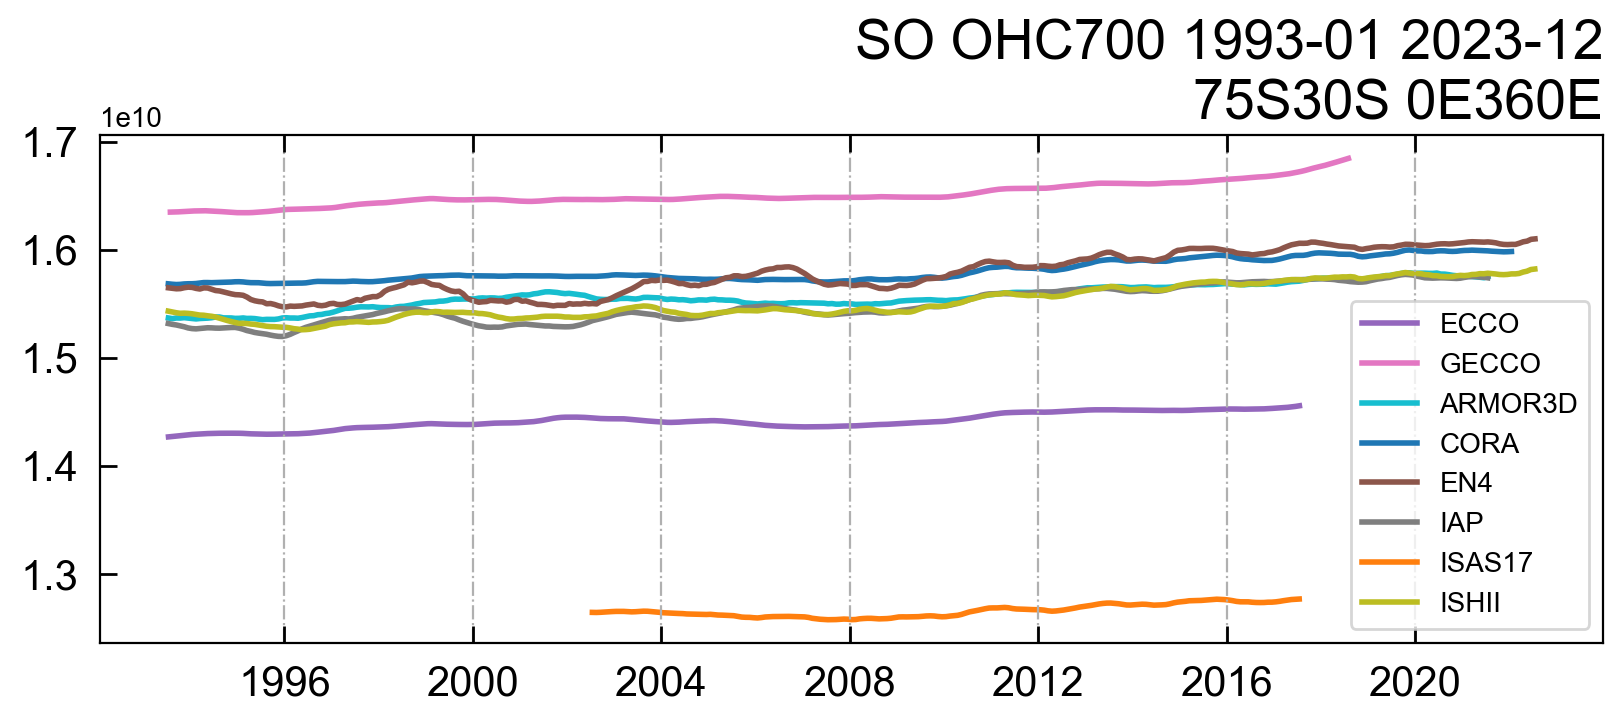

In [66]:
### Figure Ensembled ==============================================================
Label_size = 18
fig, axs = plt.subplots(1,1,figsize=(8,3.5),constrained_layout = True,dpi=200)
for s,nm in zip(mySig,myNm):
    axs.plot(s.time,s,label=nm,linewidth=2,zorder=0,alpha=1,color=dta_colr(nm))
axs.set_title('SO OHC700 '+str(t_rng[0])+' '+str(t_rng[-1])+'\n'+str(lat_rng[0]).replace('-','')+'S'+str(lat_rng[-1]).replace('-','')+'S '+\
    str(lon_rng[0])+'E'+str(lon_rng[-1])+'E',loc='right',fontdict={'fontsize':20,'fontweight':'regular','fontstyle':'normal'})
axs.tick_params(axis='both', labelsize=Label_size)
axs.grid(axis='x',linestyle='-.')
# axs.set_xlim(['1993-01','2022-12'])
axs.tick_params(axis='x', direction='in', length=6, pad=8, labelsize=Label_size-3, labelcolor='k', top=True,width=1.)
axs.tick_params(axis='y', direction='in', length=6, pad=8, labelsize=Label_size-3, width=1., color='k')
plt.legend(fontsize=Label_size-8)
if 1:
    print(wpth+'TimeSeries'+str(t_rng[0])+'_'+str(t_rng[-1]))
    plt.savefig(wpth+'TimeSeries'+str(t_rng[0]).replace('-','')+'_'+str(t_rng[-1]).replace('-',''),bbox_inches='tight')
plt.show()

In [69]:
print('sorry bro...')

sorry bro...
